In [15]:
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

In [18]:
data=pd.read_excel(r"G:\Mon Drive\Perso\Ironhack\Data_final_project\AccidentsVR.xlsx")
data

,Num_Acc,Date,jour,mois,an,Mapping_traffic,heure,hrmn,lum,agg,...,infra,situ,catu,grav,sexe,an_nais,trajet,catv,obs,obsm
0,202000000031,2020-03-04,4,3,2020,Evening peak,20,20:00:00,3,2,...,0,1,1,4,1,1994,5,1,0,2
1,202000000031,2020-03-04,4,3,2020,Evening peak,20,20:00:00,3,2,...,0,1,1,1,2,1985,1,1,0,2
2,202000000032,2020-03-06,6,3,2020,Evening peak,20,20:40:00,5,2,...,0,5,1,4,2,1999,9,1,0,2
3,202000000035,2020-03-06,6,3,2020,Off peak (night),21,21:00:00,5,2,...,0,6,1,4,1,1993,5,1,0,2
4,202000000035,2020-03-06,6,3,2020,Off peak (night),21,21:00:00,5,2,...,0,6,1,1,1,1965,4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,201900058477,2019-05-31,31,5,2019,Off peak (night),21,21:10:00,5,2,...,0,6,1,1,1,1968,4,1,0,2
3785,201900058477,2019-05-31,31,5,2019,Off peak (night),21,21:10:00,5,2,...,0,6,1,4,1,1993,5,1,0,2
3786,201900058778,2019-11-30,30,11,2019,Evening peak,17,17:25:00,5,2,...,0,1,1,4,1,1986,1,1,0,2
3787,201900058778,2019-11-30,30,11,2019,Evening peak,17,17:25:00,5,2,...,0,1,1,1,1,1980,5,1,0,2


In [19]:
data.drop(['jour', 'mois', 'an', 'hrmn'], axis=1, inplace=True)
data.head()

,Num_Acc,Date,Mapping_traffic,heure,lum,agg,int,atm,col,lat,...,infra,situ,catu,grav,sexe,an_nais,trajet,catv,obs,obsm
0,202000000031,2020-03-04,Evening peak,20,3,2,3,2,3,48.889165,...,0,1,1,4,1,1994,5,1,0,2
1,202000000031,2020-03-04,Evening peak,20,3,2,3,2,3,48.889165,...,0,1,1,1,2,1985,1,1,0,2
2,202000000032,2020-03-06,Evening peak,20,5,2,1,1,3,48.834481,...,0,5,1,4,2,1999,9,1,0,2
3,202000000035,2020-03-06,Off peak (night),21,5,2,7,1,3,48.857181,...,0,6,1,4,1,1993,5,1,0,2
4,202000000035,2020-03-06,Off peak (night),21,5,2,7,1,3,48.857181,...,0,6,1,1,1,1965,4,1,0,2


In [20]:
data.Date = pd.to_datetime(data.Date, utc=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Num_Acc          3789 non-null   int64              
 1   Date             3789 non-null   datetime64[ns, UTC]
 2   Mapping_traffic  3789 non-null   object             
 3   heure            3789 non-null   int64              
 4   lum              3789 non-null   int64              
 5   agg              3789 non-null   int64              
 6   int              3789 non-null   int64              
 7   atm              3789 non-null   int64              
 8   col              3789 non-null   int64              
 9   lat              3789 non-null   float64            
 10  long             3789 non-null   float64            
 11  catr             3789 non-null   int64              
 12  surf             3789 non-null   int64              
 13  infra            3

In [21]:
data.Date = data.Date.apply(lambda x: x.toordinal())
data.head()

,Num_Acc,Date,Mapping_traffic,heure,lum,agg,int,atm,col,lat,...,infra,situ,catu,grav,sexe,an_nais,trajet,catv,obs,obsm
0,202000000031,737488,Evening peak,20,3,2,3,2,3,48.889165,...,0,1,1,4,1,1994,5,1,0,2
1,202000000031,737488,Evening peak,20,3,2,3,2,3,48.889165,...,0,1,1,1,2,1985,1,1,0,2
2,202000000032,737490,Evening peak,20,5,2,1,1,3,48.834481,...,0,5,1,4,2,1999,9,1,0,2
3,202000000035,737490,Off peak (night),21,5,2,7,1,3,48.857181,...,0,6,1,4,1,1993,5,1,0,2
4,202000000035,737490,Off peak (night),21,5,2,7,1,3,48.857181,...,0,6,1,1,1,1965,4,1,0,2


In [22]:
#target variable is gravity of accident
data.rename(columns={'grav': 'target'}, inplace=True)
data.head()

,Num_Acc,Date,Mapping_traffic,heure,lum,agg,int,atm,col,lat,...,infra,situ,catu,target,sexe,an_nais,trajet,catv,obs,obsm
0,202000000031,737488,Evening peak,20,3,2,3,2,3,48.889165,...,0,1,1,4,1,1994,5,1,0,2
1,202000000031,737488,Evening peak,20,3,2,3,2,3,48.889165,...,0,1,1,1,2,1985,1,1,0,2
2,202000000032,737490,Evening peak,20,5,2,1,1,3,48.834481,...,0,5,1,4,2,1999,9,1,0,2
3,202000000035,737490,Off peak (night),21,5,2,7,1,3,48.857181,...,0,6,1,4,1,1993,5,1,0,2
4,202000000035,737490,Off peak (night),21,5,2,7,1,3,48.857181,...,0,6,1,1,1,1965,4,1,0,2


In [23]:
data.target.value_counts()

4    2126
1    1563
3      90
2      10
Name: target, dtype: int64

In [24]:
data_sample=data[(data.target==1) | (data.target==4)]
data_sample

,Num_Acc,Date,Mapping_traffic,heure,lum,agg,int,atm,col,lat,...,infra,situ,catu,target,sexe,an_nais,trajet,catv,obs,obsm
0,202000000031,737488,Evening peak,20,3,2,3,2,3,48.889165,...,0,1,1,4,1,1994,5,1,0,2
1,202000000031,737488,Evening peak,20,3,2,3,2,3,48.889165,...,0,1,1,1,2,1985,1,1,0,2
2,202000000032,737490,Evening peak,20,5,2,1,1,3,48.834481,...,0,5,1,4,2,1999,9,1,0,2
3,202000000035,737490,Off peak (night),21,5,2,7,1,3,48.857181,...,0,6,1,4,1,1993,5,1,0,2
4,202000000035,737490,Off peak (night),21,5,2,7,1,3,48.857181,...,0,6,1,1,1,1965,4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,201900058477,737210,Off peak (night),21,5,2,2,1,3,48.863671,...,0,6,1,1,1,1968,4,1,0,2
3785,201900058477,737210,Off peak (night),21,5,2,2,1,3,48.863671,...,0,6,1,4,1,1993,5,1,0,2
3786,201900058778,737393,Evening peak,17,5,2,2,1,3,48.848598,...,0,1,1,4,1,1986,1,1,0,2
3787,201900058778,737393,Evening peak,17,5,2,2,1,3,48.848598,...,0,1,1,1,1,1980,5,1,0,2


In [25]:
data_sample.head()

,Num_Acc,Date,Mapping_traffic,heure,lum,agg,int,atm,col,lat,...,infra,situ,catu,target,sexe,an_nais,trajet,catv,obs,obsm
0,202000000031,737488,Evening peak,20,3,2,3,2,3,48.889165,...,0,1,1,4,1,1994,5,1,0,2
1,202000000031,737488,Evening peak,20,3,2,3,2,3,48.889165,...,0,1,1,1,2,1985,1,1,0,2
2,202000000032,737490,Evening peak,20,5,2,1,1,3,48.834481,...,0,5,1,4,2,1999,9,1,0,2
3,202000000035,737490,Off peak (night),21,5,2,7,1,3,48.857181,...,0,6,1,4,1,1993,5,1,0,2
4,202000000035,737490,Off peak (night),21,5,2,7,1,3,48.857181,...,0,6,1,1,1,1965,4,1,0,2


In [26]:
data_sample.drop(['Mapping_traffic'], axis=1, inplace=True)
data_sample.head()

C:\Users\Administrateur\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Num_Acc,Date,heure,lum,agg,int,atm,col,lat,long,...,infra,situ,catu,target,sexe,an_nais,trajet,catv,obs,obsm
0,202000000031,737488,20,3,2,3,2,3,48.889165,2.297530,...,0,1,1,4,1,1994,5,1,0,2
1,202000000031,737488,20,3,2,3,2,3,48.889165,2.297530,...,0,1,1,1,2,1985,1,1,0,2
2,202000000032,737490,20,5,2,1,1,3,48.834481,2.334212,...,0,5,1,4,2,1999,9,1,0,2
3,202000000035,737490,21,5,2,7,1,3,48.857181,2.347327,...,0,6,1,4,1,1993,5,1,0,2
4,202000000035,737490,21,5,2,7,1,3,48.857181,2.347327,...,0,6,1,1,1,1965,4,1,0,2


In [28]:
data_sample.to_csv(r"C:\Users\Administrateur\Ironhack\LAB\DAFT_212\Final_project\data_model_tpot_indemne_leger_long.csv")

In [27]:
data_sample=pd.read_csv(r"C:\Users\Administrateur\Ironhack\LAB\DAFT_212\Final_project\data_model_tpot_indemne_leger_long.csv")
data_sample.head()

,Unnamed: 0,Unnamed: 0.1,Num_Acc,Date,heure,lum,agg,int,atm,col,...,infra,situ,catu,target,sexe,an_nais,trajet,catv,obs,obsm
0,0,0,202000000031,737488,20,3,2,3,2,3,...,0,1,1,4,1,1994,5,1,0,2
1,1,1,202000000031,737488,20,3,2,3,2,3,...,0,1,1,1,2,1985,1,1,0,2
2,2,2,202000000032,737490,20,5,2,1,1,3,...,0,5,1,4,2,1999,9,1,0,2
3,3,3,202000000035,737490,21,5,2,7,1,3,...,0,6,1,4,1,1993,5,1,0,2
4,4,4,202000000035,737490,21,5,2,7,1,3,...,0,6,1,1,1,1965,4,1,0,2


In [28]:
x=data_sample.drop(['target', "Unnamed: 0", "Unnamed: 0.1"], axis=1)
y=data_sample['target']

In [29]:
data_sample.shape

(3689, 24)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)
model = TPOTClassifier(generations=50, mutation_rate=0.9, population_size=50, verbosity=3, n_jobs=-1,config_dict="TPOT light", periodic_checkpoint_folder=('./'))
model.fit(X_train, y_train)
model.export('tpot_model_indemne_leger_long.py')

19 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/2550 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 88.
_pre_test decorator: _random_mutation_operator: num_test=0 cosine was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=1 l1 was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..

Generation 7 - Current Pareto front scores:

-1	0.6908019465914201	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=8, DecisionTreeClassifier__min_samples_split=11)
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..

Generation 13 - Current Pareto front scores:

-1	0.6936375904796958	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=e

_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..

Generation 18 - Current Pareto front scores:

-1	0.6936375904796958	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=9, DecisionTreeClassifier__min_samples_split=4)

-2	0.6980869422974687	DecisionTreeClassifier(VarianceThreshold(input_matrix, VarianceThreshold__threshold=0.01), DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=16, DecisionTreeClassifier__min_samples_split=15)
Periodic pipeline was not saved, probably saved before...
Periodic pipeline was not saved, probably saved before...
_pre_test decorator: _random_mutation_operator: num_test=0 Expecte

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 23 - Current Pareto front scores:

-1	0.6936375904796958	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=9, DecisionTreeClassifier__min_samples_split=4)

-2	0.6980869422974687	DecisionTreeClassifier(VarianceThreshold(input_matrix, VarianceThreshold__threshold=0.01), DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=16, DecisionTreeClassifier__min_samples_split=15)
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 No feature in X meets the variance threshold 0.20000.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 No feature in X meets the variance threshold 0.05000.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 28 - Current Pareto front scores:

-1	0.6936375904796958	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=9, DecisionTreeClassifier__min_samples_split=4)

-2	0.6980869422974687	DecisionTreeClassifier(VarianceThreshold(input_matrix, VarianceThreshold__threshold=0.01)

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 33 - Current Pareto front scores:

-1	0.6936375904796958	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=9, DecisionTreeClassifier__min_samples_split=4)

-2	0.6980869422974687	DecisionTreeClassifier(VarianceThreshold(input_matrix, VarianceThreshold__threshold=0.01), DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=16, DecisionTreeClassifier__min_samples_split=15)
_pre_test decorator: _random_mutation_operator: num_

_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 60.
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 No feature in X meets the variance threshold 0.20000.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
_pre_test decorator: _random_mutation_op


Generation 40 - Current Pareto front scores:

-1	0.6936375904796958	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=9, DecisionTreeClassifier__min_samples_split=4)

-2	0.6980869422974687	DecisionTreeClassifier(VarianceThreshold(input_matrix, VarianceThreshold__threshold=0.01), DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=16, DecisionTreeClassifier__min_samples_split=15)
Periodic pipeline was not saved, probably saved before...
Periodic pipeline was not saved, probably saved before...
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 manhattan was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_te


Generation 44 - Current Pareto front scores:

-1	0.6936375904796958	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=9, DecisionTreeClassifier__min_samples_split=4)

-2	0.6980869422974687	DecisionTreeClassifier(VarianceThreshold(input_matrix, VarianceThreshold__threshold=0.01), DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=16, DecisionTreeClassifier__min_samples_split=15)
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_


Generation 48 - Current Pareto front scores:

-1	0.6936375904796958	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=9, DecisionTreeClassifier__min_samples_split=4)

-2	0.6980869422974687	DecisionTreeClassifier(VarianceThreshold(input_matrix, VarianceThreshold__threshold=0.01), DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=16, DecisionTreeClassifier__min_samples_split=15)
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=1 manhattan was provided as affinity. Ward can only work with euclidean distances..
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_

In [35]:
tpot_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
tpot_data.head()

,Num_Acc,Date,heure,lum,agg,int,atm,col,lat,long,...,infra,situ,catu,target,sexe,an_nais,trajet,catv,obs,obsm
0,2.020000e+11,737488.0,20.0,3.0,2.0,3.0,2.0,3.0,48.889165,2.297530,...,0.0,1.0,1.0,4.0,1.0,1994.0,5.0,1.0,0.0,2.0
1,2.020000e+11,737488.0,20.0,3.0,2.0,3.0,2.0,3.0,48.889165,2.297530,...,0.0,1.0,1.0,1.0,2.0,1985.0,1.0,1.0,0.0,2.0
2,2.020000e+11,737490.0,20.0,5.0,2.0,1.0,1.0,3.0,48.834481,2.334212,...,0.0,5.0,1.0,4.0,2.0,1999.0,9.0,1.0,0.0,2.0
3,2.020000e+11,737490.0,21.0,5.0,2.0,7.0,1.0,3.0,48.857181,2.347327,...,0.0,6.0,1.0,4.0,1.0,1993.0,5.0,1.0,0.0,2.0
4,2.020000e+11,737490.0,21.0,5.0,2.0,7.0,1.0,3.0,48.857181,2.347327,...,0.0,6.0,1.0,1.0,1.0,1965.0,4.0,1.0,0.0,2.0


In [38]:
acc_train=exported_pipeline.score(training_features, training_target)
acc_test=exported_pipeline.score(testing_features, testing_target)

In [41]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

tpot_data = pd.read_csv(r"C:\Users\Administrateur\Ironhack\LAB\DAFT_212\Final_project\data_model_tpot_indemne_leger_long.csv", dtype=np.float64)
features = tpot_data.drop(['target', "Unnamed: 0", "Unnamed: 0.1"], axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

In [36]:
# Average CV score on the training set was: 0.6980869422974687
exported_pipeline = make_pipeline(
    VarianceThreshold(threshold=0.01),
    DecisionTreeClassifier(criterion="entropy", max_depth=7, 
                           min_samples_leaf=16, min_samples_split=15))

In [37]:
exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [39]:
print('Accuracy on train:', round(acc_train, 2))
print('\nAccuracy on test:', round(acc_test, 2))
print(metrics.classification_report(testing_target, results, zero_division=1))

Accuracy on train: 0.69

Accuracy on test: 0.68
              precision    recall  f1-score   support

         1.0       0.66      0.46      0.54       376
         4.0       0.69      0.84      0.76       547

    accuracy                           0.68       923
   macro avg       0.68      0.65      0.65       923
weighted avg       0.68      0.68      0.67       923



C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


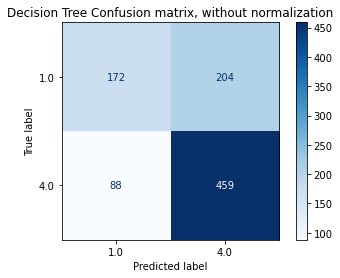

In [40]:
matrix=metrics.confusion_matrix(testing_target, results)
cm=metrics.plot_confusion_matrix(exported_pipeline, testing_features, testing_target, cmap = 'Blues')
cm.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [166]:
tpot_data.columns

Index(['Unnamed: 0', 'heure', 'lum', 'agg', 'int', 'atm', 'catr', 'surf',
       'situ', 'target', 'sexe', 'obsm'],
      dtype='object')

In [42]:
####recall score
r=metrics.recall_score(testing_target, results, average='weighted')
print(r)

0.5124593716143012


In [43]:
####f1 score
f1=metrics.f1_score(testing_target, results, average='weighted')
f1

0.4908363965075458

In [44]:
print('Accuracy on train:', round(acc_train, 2))
print('\nAccuracy on test:', round(acc_test, 2))
print('\nConfusion matrix\n', matrix)
print('\nRecall score:', round(r, 2))
print('\nF1 score:', round(f1, 2))

Accuracy on train: 0.69

Accuracy on test: 0.68

Confusion matrix
 [[172 204]
 [ 88 459]]

Recall score: 0.51

F1 score: 0.49
